# Basic filtering dataset LOCSS

In [2]:
import pandas as pd
import os
from LOCSS_data_structure import GaugeCollection
import seaborn as sns
import matplotlib.pyplot as plt
current_dir=os.getcwd()
current_dir

'/home/angelica/Documents/py_linux/pylocss/src'

Read coodinates and data

In [4]:
df_locss=pd.read_csv('../data/readings.csv')
df_locss=pd.read_csv('../data/readings_up_to_12202021.csv', parse_dates=['date'])
df_coord_locss=pd.read_csv('../data/gauges.csv', sep=";")

In [5]:
df_coord_locss.columns

Index(['id', 'gauge_id', 'name', 'city', 'latitude', 'longitude', 'timezone',
       'unit', 'min_height', 'max_height', 'installation_date',
       'initial_reading', 'notes', 'created_at', 'updated_at'],
      dtype='object')

In [6]:
#df_coord_locss.info()
#df_locss.info()
df_coord_locss['location']=df_coord_locss['gauge_id'].str.slice(2,4)
#df_coord_locss.loc[df_coord_locss['gauge_id'].str.slice(2,4)=='F2'][['gauge_id','min_height','max_height']]
df_coord_locss.loc[df_coord_locss['gauge_id']=='ARH2'][['gauge_id','min_height','max_height']]#.location.unique()

,gauge_id,min_height,max_height
157,ARH2,3.33,6.66


In [7]:
#Define functions

#format dataframe
def format_df_stats(stat_df, id_fd, df_base_fd):
    stats_fd=['count','mean','std','min','25c','50c','75c','max']
    name_vs=[]
    for vfd in df_base_fd:
        name_vs=name_vs+[vfd+'_'+sfd for sfd in stats_fd]
    new_colnames=id_fd+name_vs
    stat_df.columns=new_colnames
    return stat_df

In [8]:
gc=GaugeCollection()
fd_id='gauge_id'
df_locss_filtered=gc.filter_test_gages(df_locss,fd_id)
df_locss_filtered=pd.merge(df_locss_filtered, df_coord_locss[['gauge_id','min_height','max_height']], on='gauge_id')
print('Before',df_locss_filtered.shape)
df_locss_filtered1=df_locss_filtered.loc[(df_locss_filtered['height']>=df_locss_filtered['min_height'])&(df_locss_filtered['height']<=df_locss_filtered['max_height'])]
#df_locss_filtered1=df_locss_filtered1[['gauge_id', 'name', 'date', 'time', 'height', 'is_bubble_level_okay']]
print('After', df_locss_filtered1.shape)
df_locss_filtered1.columns

Before (21229, 10)
After (21084, 10)


Index(['gauge_id', 'name', 'date', 'time', 'height', 'is_bubble_level_okay',
       'notes', 'phone_no', 'min_height', 'max_height'],
      dtype='object')

In [20]:
df_locss_non_valid=df_locss_filtered.loc[~((df_locss_filtered['height']>=df_locss_filtered['min_height'])&
                                            (df_locss_filtered['height']<=df_locss_filtered['max_height']))]
df_locss_non_valid=df_locss_non_valid.copy()
df_locss_non_valid.shape

(145, 10)

In [21]:
df_locss_non_valid.gauge_id.unique()

df_stats_non_valid=df_locss_non_valid[['gauge_id', 'name', 'date', 'time', 'height', 'is_bubble_level_okay']].groupby('gauge_id').describe().reset_index()
id_fd=['gauge_id']
df_base_fd=['height']
df_stats_non_valid=format_df_stats(df_stats_non_valid, id_fd, df_base_fd)
df_stats_non_valid['Country_State']=df_stats_non_valid['gauge_id'].str.slice(2,4)

In [25]:
df_stats_non_valid.to_csv('../data/non_valid_locss_20220402.csv')

In [28]:
df_stats_non_valid.columns

Index(['gauge_id', 'height_count', 'height_mean', 'height_std', 'height_min',
       'height_25c', 'height_50c', 'height_75c', 'height_max',
       'Country_State'],
      dtype='object')

AttributeError: module 'matplotlib' has no attribute 'show'

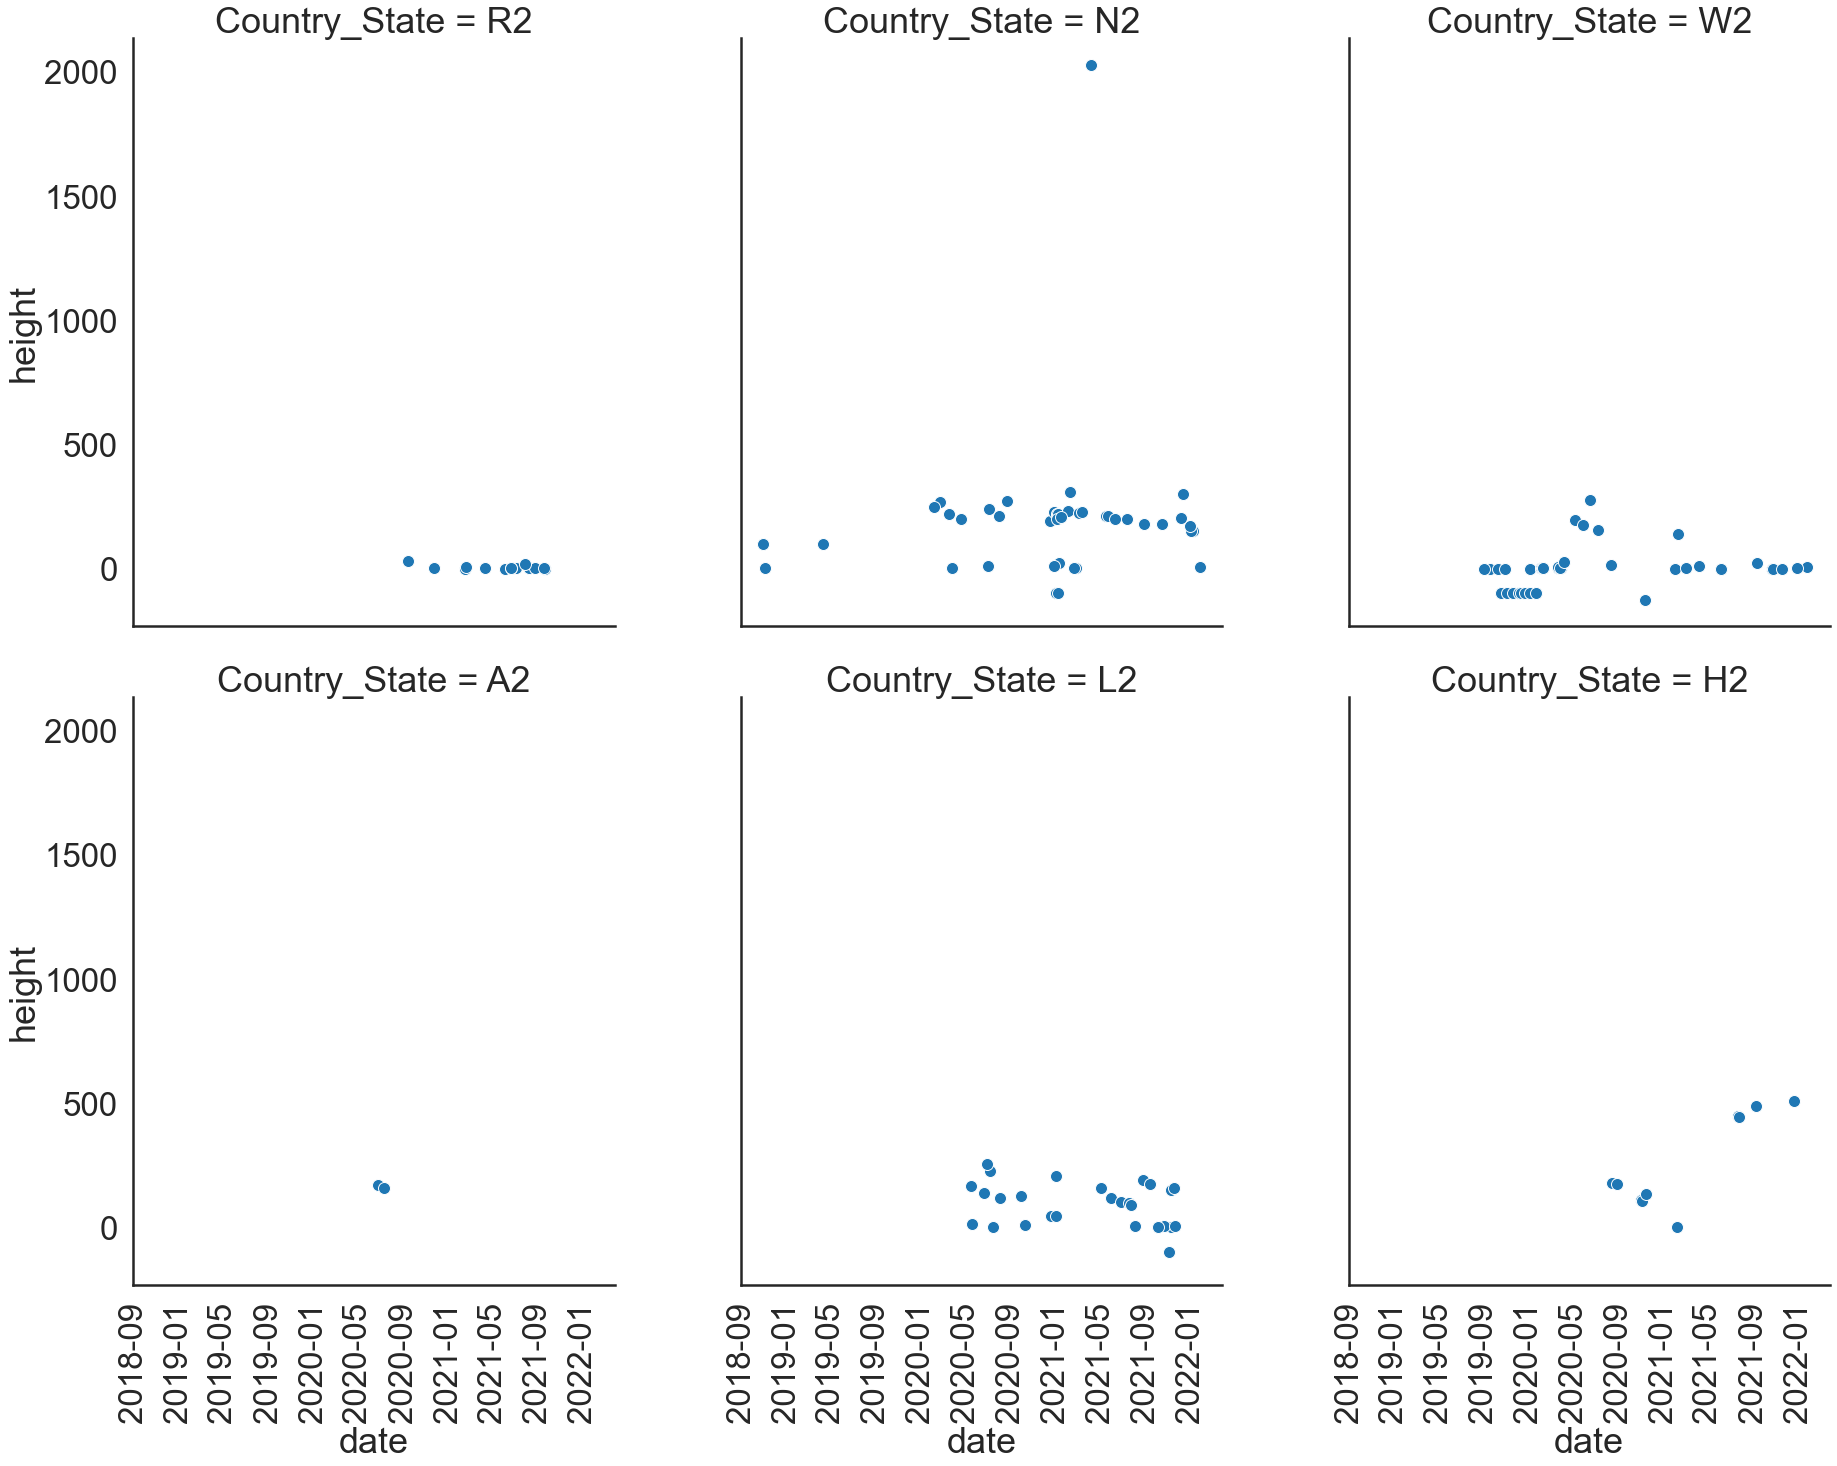

In [34]:
import seaborn as sns
import matplotlib as plt

sns.set_style('white')
sns.set_context('poster', font_scale=1.5)

df=df_locss_non_valid.copy()
df['Country_State']=df['gauge_id'].str.slice(2,4)
facet_c='gauge_id'
x_field='date'
y_field='height'
facet_c='Country_State'
#y_lim=[0,10]
#kind_plot='line'
g_n=sns.relplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             col_wrap=3,
             col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             aspect=.9,
             height=10)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
#plt.ylim(y_lim[0],y_lim[1])
g_n.savefig('../data/20220204.png')

plt.show()

Get number of records by station 

In [138]:
df_locss_filtered=df_locss_filtered1[['gauge_id', 'name', 'date', 'time', 'height', 'is_bubble_level_okay']]
df_locss_filtered.gauge_id.unique().shape
df_stats=df_locss_filtered.groupby(fd_id).describe().reset_index()
id_fd=[fd_id]
df_base_fd=['height']
df_stats
df_stats=format_df_stats(df_stats, id_fd, df_base_fd)
df_stats_gt2=df_stats.loc[df_stats['height_count']>2]
df_stats_gt2[fd_id]
df_locss_filtered=df_locss_filtered.loc[df_locss_filtered[fd_id].isin(df_stats_gt2[fd_id])]
df_locss_filtered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21068 entries, 0 to 21228
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gauge_id              21068 non-null  object        
 1   name                  21068 non-null  object        
 2   date                  21068 non-null  datetime64[ns]
 3   time                  21068 non-null  object        
 4   height                21068 non-null  float64       
 5   is_bubble_level_okay  15744 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB


In [139]:
#Read lake in orbits
df_locss_orbits_lakes=pd.read_csv('../data/gauge_lake_dates_area_20220202.csv')
df_locss_orbits_lakes.head()
df_locss_only=df_locss_orbits_lakes.loc[df_locss_orbits_lakes['Source']=='LOCSS']
df_locss_filtered=df_locss_filtered.loc[df_locss_filtered[fd_id].isin(df_locss_only['Gauge ID'])]
df_locss_filtered['Country_State']=df_locss_filtered['gauge_id'].str.slice(2,4)
df_locss_filtered['Country_State'].unique()
df_locss_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 142 to 21228
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gauge_id              7625 non-null   object        
 1   name                  7625 non-null   object        
 2   date                  7625 non-null   datetime64[ns]
 3   time                  7625 non-null   object        
 4   height                7625 non-null   float64       
 5   is_bubble_level_okay  7048 non-null   object        
 6   Country_State         7625 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 476.6+ KB


In [140]:
df_stats_lo=df_locss_filtered.groupby(fd_id).describe().reset_index()
id_fd=[fd_id]
df_base_fd=['height']
df_stats_lo=format_df_stats(df_stats_lo, id_fd, df_base_fd)
df_stats_lo['max_min']=df_stats_lo['height_max']-df_stats_lo['height_min']
df_stats_lo['h25_75c']=df_stats_lo['height_75c']-df_stats_lo['height_25c']
df_stats_lo['Country_State']=df_stats_lo['gauge_id'].str.slice(2,4)

In [54]:
df_stats_lo.loc[df_stats_lo['max_min']>1.5].shape
df_locss_only['Gauge ID'].unique().shape

(49,)

C:\Users\amgomez\anaconda3\envs\pycharm\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


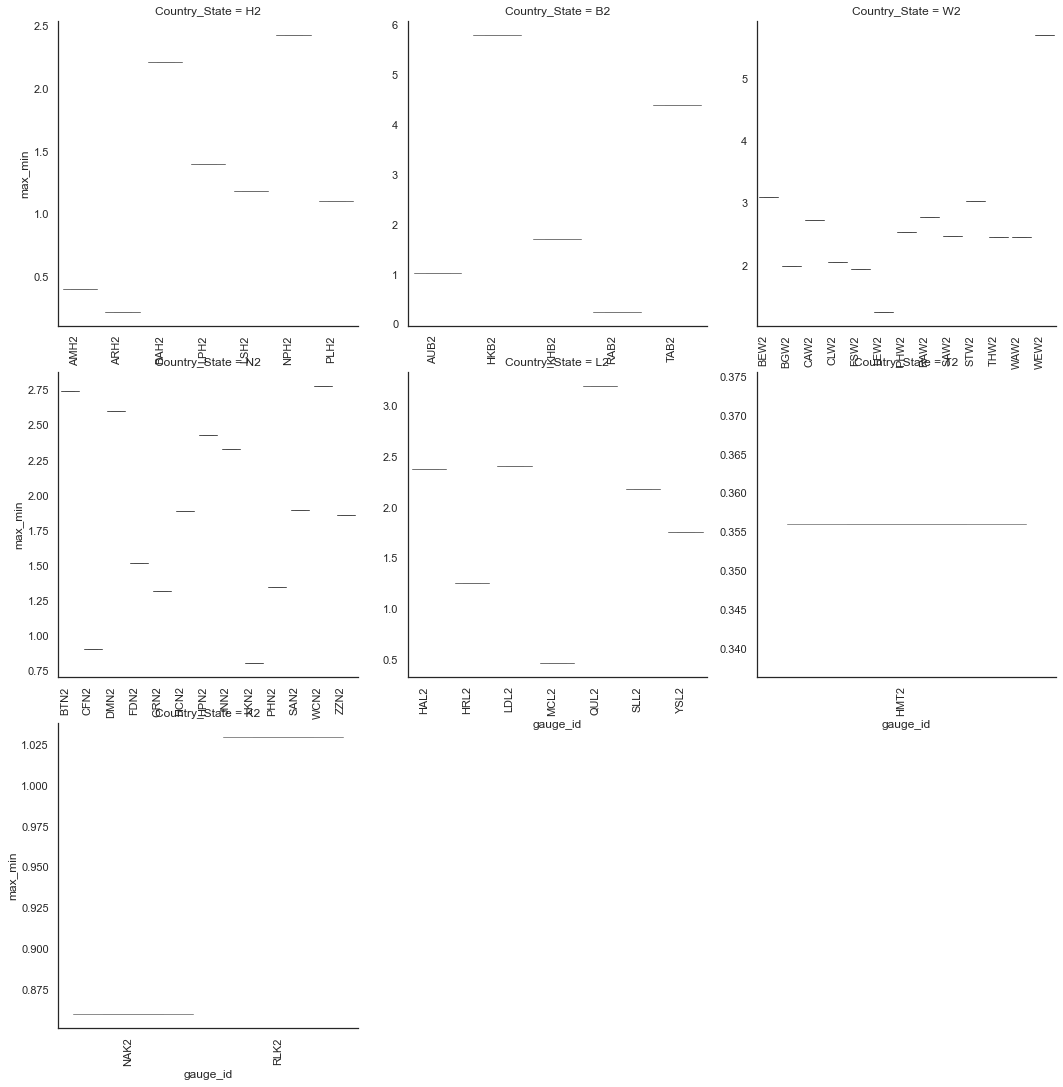

In [106]:
#%% #Plot PRI_ab test by season
sns.set_style('white')
sns.set_context('notebook')#, font_scale=1.5)
palette=sns.color_palette("light:#5A9", 13)

df=df_stats_lo.copy()

# df=df[(df['year_month']!='2020-09')|(df['year_month']!='2020-08')]
# # df=df[(df['hour']<17)&(df['hour']>6)]

x_field='gauge_id'
y_field='max_min'
hue_field='gauge_id'
facet_c='Country_State'
kind_plot='box'

#kind_plot='line'
#x_axis_name='Hour'
#y_axis_name='PRI_ab'
#ylim=[0,1]
#df=df.loc[(df[y_field]<10) & (df[y_field]>=0)]
g_n=sns.catplot(data=df,x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot, 
                col_wrap=3,
                col=facet_c, sharex=False, sharey=False, dodge=False)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()
del df

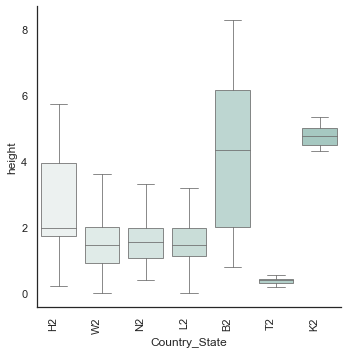

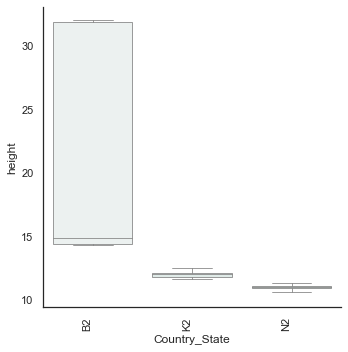

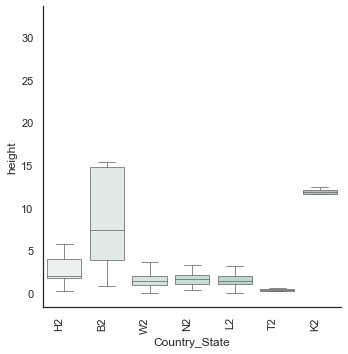

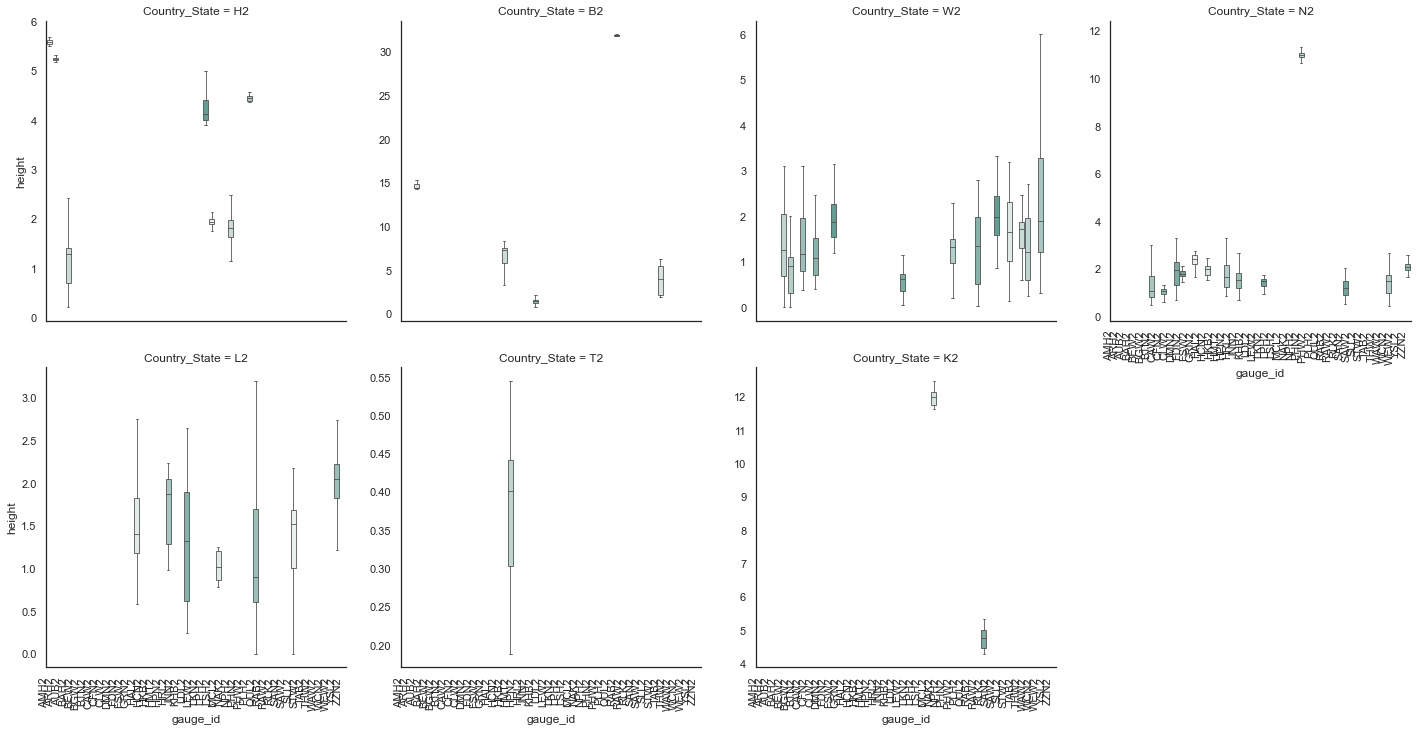

In [107]:
#%% #Plot PRI_ab test by season
sns.set_style('white')
sns.set_context('notebook')#, font_scale=1.5)
palette=sns.color_palette("light:#5A9", 13)

df=df_locss_filtered.copy()

# df=df[(df['year_month']!='2020-09')|(df['year_month']!='2020-08')]
# # df=df[(df['hour']<17)&(df['hour']>6)]

x_field='Country_State'
y_field='height'
hue_field='gauge_id'
facet_c='Country_State'
kind_plot='box'

#kind_plot='line'
#x_axis_name='Hour'
#y_axis_name='PRI_ab'
#ylim=[0,1]
#
g_n=sns.catplot(data=df.loc[(df[y_field]<10) & (df[y_field]>=0)],x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot)#, 
                #col_wrap=3,
                #col=facet_c)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

g_n=sns.catplot(data=df.loc[(df[y_field]<1000) & (df[y_field]>=10)],x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot)#, 
                #col_wrap=3,
                #col=facet_c)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

g_n=sns.catplot(data=df,x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot)#, 
                #col_wrap=3,
                #col=facet_c)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

x_field='gauge_id'
g_n=sns.catplot(data=df,x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot, 
                col_wrap=4,
                col=facet_c, sharey=False)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

del df

In [141]:
df_locss_filtered = pd.merge(df_locss_filtered, df_locss_orbits_lakes[['Gauge ID', 'Hylak_id']], left_on='gauge_id', right_on='Gauge ID').drop('Gauge ID', axis=1)


In [142]:
df_locss_filtered.head()

,gauge_id,name,date,time,height,is_bubble_level_okay,Country_State,Hylak_id
0,AMH2,Angle Pond,2021-06-12,12:59:00,5.52,Yes,H2,1049723
1,AMH2,Angle Pond,2021-06-16,12:00:00,5.54,Yes,H2,1049723
2,AMH2,Angle Pond,2021-06-25,12:00:00,5.42,Yes,H2,1049723
3,AMH2,Angle Pond,2021-07-02,08:00:00,5.60,Yes,H2,1049723
4,AMH2,Angle Pond,2021-07-11,06:21:36,5.74,Yes,H2,1049723


In [143]:
df_locss_filtered['date']=df_locss_filtered['date']+pd.to_timedelta(df_locss_filtered["time"])#df_locss_filtered['date']
df_locss_filtered.head()

,gauge_id,name,date,time,height,is_bubble_level_okay,Country_State,Hylak_id
0,AMH2,Angle Pond,2021-06-12 12:59:00,12:59:00,5.52,Yes,H2,1049723
1,AMH2,Angle Pond,2021-06-16 12:00:00,12:00:00,5.54,Yes,H2,1049723
2,AMH2,Angle Pond,2021-06-25 12:00:00,12:00:00,5.42,Yes,H2,1049723
3,AMH2,Angle Pond,2021-07-02 08:00:00,08:00:00,5.60,Yes,H2,1049723
4,AMH2,Angle Pond,2021-07-11 06:21:36,06:21:36,5.74,Yes,H2,1049723


In [148]:
lakes=[177597,177078]
df_locss_filtered.loc[df_locss_filtered['Hylak_id'].isin(lakes)][['date', 'height','gauge_id','Hylak_id']].to_csv('../data/sample_gauges_val_locss_20220203.csv', index=False)

In [129]:
df_locss_filtered['Hylak_id'].unique()
#os.getcwd()

array([1049723, 1047028,  110633, 1385261, 1048439, 1009100,  107337,
        113089, 1000426,  113030,  107565,    9394,    9340,  104829,
          9374, 1051005,  177215, 1386047,  865120,  113086, 1052392,
       1061306,  177597, 1051214, 1024813, 1047799,  110970, 1051235,
       1048717, 1049532,    8476, 1045695, 1052515, 1384493,  104148,
          9035,  113076, 1052865, 1013558,  177078, 1002627,    8478,
        104861, 1051300], dtype=int64)

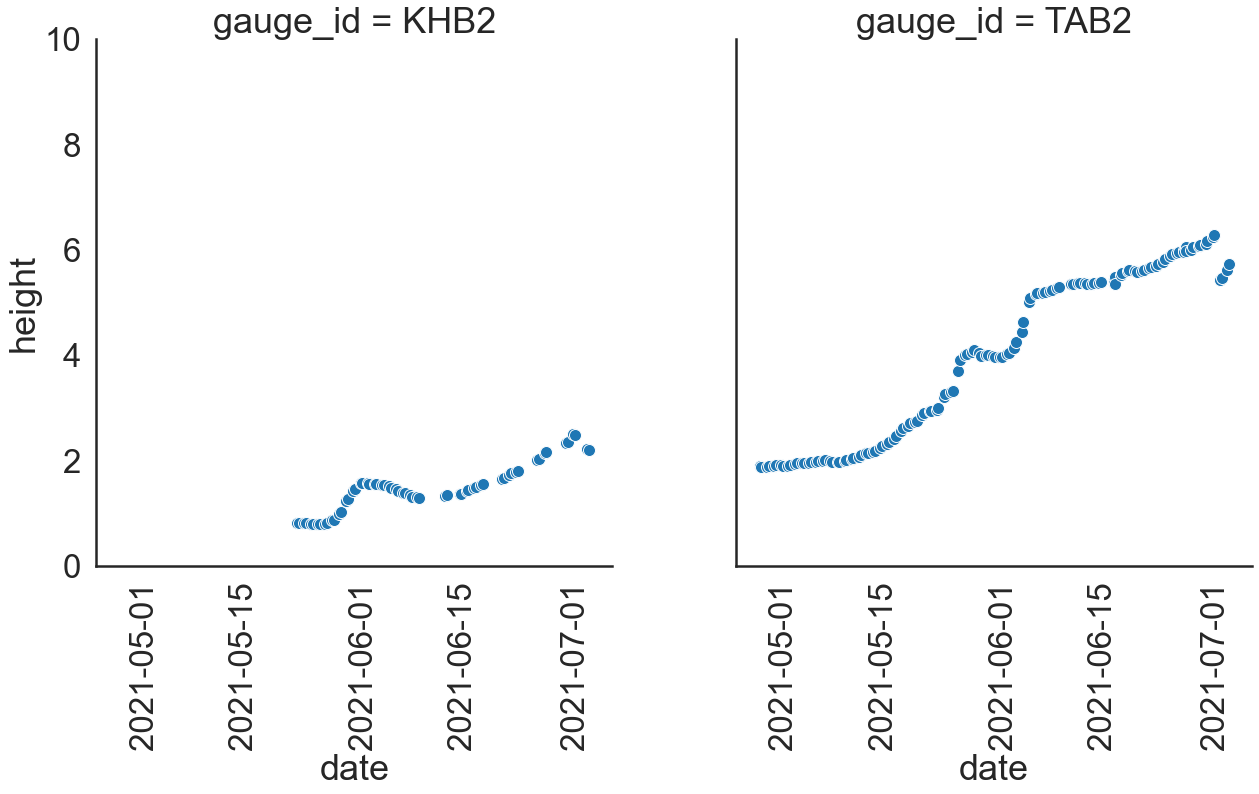

In [150]:
sns.set_style('white')
sns.set_context('poster', font_scale=1.5)
df=df_locss_filtered.copy()
facet_c='gauge_id'
x_field='date'
y_field='height'
y_lim=[0,10]
#kind_plot='line'
g_n=sns.relplot(data=df.loc[df['Hylak_id'].isin(lakes)],x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             col_wrap=3,
             col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             aspect=.9,
             height=10)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.ylim(y_lim[0],y_lim[1])

plt.show()

In [21]:
df_dates_max_min=df_locss_filtered[[fd_id,'date']].groupby(fd_id).describe(datetime_is_numeric=True).reset_index()
df_dates_max_min=df_dates_max_min.astype(str) 
df_dates_max_min.info()

df_dates_max_min.to_csv('../data/dates_LOCSS_stations20220113.csv')

#Pendiente - Crear archivo and Join with the final stations
#df_base_fd=['date']
#df_dates_max_min=format_df_stats(df_dates_max_min, id_fd, df_base_fd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   (gauge_id, )   176 non-null    object
 1   (date, count)  176 non-null    object
 2   (date, mean)   176 non-null    object
 3   (date, min)    176 non-null    object
 4   (date, 25%)    176 non-null    object
 5   (date, 50%)    176 non-null    object
 6   (date, 75%)    176 non-null    object
 7   (date, max)    176 non-null    object
dtypes: object(8)
memory usage: 11.1+ KB


In [ ]:
!pip install wheel

In [ ]:
!pip install pipwin

In [ ]:
!pipwin install shapely
!pipwin install gdal
!pipwin install fiona
!pipwin install pyproj
!pipwin install six
!pipwin install rtree
!pipwin install geopandas

In [6]:
#Get geopandas data 


In [20]:
df_locss_records=df_locss.groupby('gauge_id').describe().reset_index()
df_locss_records.loc[df_locss_records]

gauge_id height                                                      \
              count         mean         std    min       25%       50%   
0        119    9.0   439.036667  773.186215   0.27    12.210    12.210   
1       AFR2  142.0  2164.098542  259.525693   0.00  2194.965  2194.995   
2       AMH2   18.0     5.572222    0.091043   5.34     5.545     5.580   
3       ARH2   26.0     5.252308    0.057432   5.18     5.220     5.245   
4       ARK2   27.0    12.439259    0.119612  12.28    12.370    12.410   
..       ...    ...          ...         ...    ...       ...       ...   
183     WHN2   53.0     1.466604    0.171800   1.06     1.360     1.440   
184     XAW2   84.0    -8.109643   29.995289 -99.99     0.730     1.470   
185     YAW2  237.0     1.227764    0.769972   0.13     0.550     1.250   
186     YSL2  178.0     1.962472    0.409247   0.98     1.820     2.050   
187     ZZN2  108.0     2.094074    0.281843   1.00     1.940     2.075   

                          
           75%       max  
0     234.0000  2222.220  
1    2195.0250  2195.175  
2       5.6200     5.740  
3       5.2675     5.400  
4      12.4700    12.700  
..         ...       ...  
183     1.5600     1.850  
184     2.1050     2.700  
185     1.7400     3.140  
186     2.2200     2.740  
187     2.2000     2.860  

[188 rows x 9 columns]

In [48]:
#how many data per station do we have 
df_locss_records=df_locss.groupby('gauge_id').describe().reset_index()
df_locss_records
id_fd=['gauge_id']
df_base_fd=['height']
df_locss_stats=format_df_stats(df_locss_records, id_fd, df_base_fd)


In [5]:
## Lakes to filter 

#Test gauges 119, MFN2 and BPN2
#Total  gauges without enough data New york: 9, total from Bangladesh: 26
filter_lakes=["MFN2","BPN2","119",
              "BRK2","CQK2","CHK2","CSK2","DPK2","LNK2","LPK2","NAK2","RLK2",
"ABB2",
"ADB2",
"BBB2",
"BHB2",
"BNB2",
"BPB2",
"BTB2",
"CCB2",
"CGB2",
"CRB2",
"CTB2",
"DAB2",
"DCB2",
"DHB2",
"DLB2",
"EDB2",
"GBB2",
"JSB2",
"KJB2",
"KSB2",
"KTB2",
"MGB2",
"MKB2",
"PTB2",
"RMB2",
"RUB2",
"SBB2"]

In [50]:
df_locss_f=df_locss.loc[~df_locss['gauge_id'].isin(filter_lakes)]


In [ ]:
df_locss_stats_f=df_locss_stats.loc[~df_locss_stats['gauge_id'].isin(filter_lakes)]
df_locss_stats_f.to_csv('../data/stats_station.csv')

In [2]:
#Last 2 digits indicating state/region/country...can it be standarized to represent the country?
#What the two first digits mean?

#Names of sites
#NC: N2, New York K2, Washinton W2, Illinois L2, Massachusetts A2, New Hampshire H2, 

#Canada T2, France R2, Bangladesh B2, Indian D2, Pakistan P2, Nepal V2


In [51]:
df_locss_f.shape

(19553, 8)

In [64]:
#Add the country
regions={'N2':'US', 'K2':'US','W2':'US','L2':'US','A2':'US','H2':'US',
        'T2':'CA', 'R2':'FR','B2':'BD','D2':'IN','P2':'PK', 'V2':'NP'}

subregions={'N2':'NC', 'K2':'NY','W2':'WA','L2':'IL','A2':'MA','H2':'NH'}
df_new=df_locss_f.copy()
variable=pd.Series([regions[id[2:4]] for id in df_locss_f['gauge_id']])

In [66]:
df_new['country']=variable

In [67]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)
for r in regions:
    df_subset=df_new.loc[df_new['country']==regions[r]]
    

,gauge_id,name,date,time,height,is_bubble_level_okay,notes,phone_no,country
8,AFR2,Étang de Fontargente - 1,2021-08-05,12:00:00,2195.045,Yes,NaN,NaN,FR
9,AFR2,Étang de Fontargente - 1,2021-08-05,12:00:00,2195.045,Yes,NaN,33669458621,FR
10,AFR2,Étang de Fontargente - 1,2021-07-11,12:00:00,2195.000,Yes,NaN,33699261282,FR
11,AFR2,Étang de Fontargente - 1,2021-07-14,13:00:00,2194.976,Yes,NaN,33609072718,FR
12,AFR2,Étang de Fontargente - 1,2021-07-16,13:00:00,2194.970,Yes,NaN,33688424709,FR


In [6]:
df_locss=pd.read_csv('../data/readings.csv')
df_locss_f=df_locss.loc[~df_locss['gauge_id'].isin(filter_lakes)]
df_locss_f

,gauge_id,name,date,time,height,is_bubble_level_okay,notes,phone_no
8,AFR2,Étang de Fontargente - 1,2021-08-05,12:00:00,2195.045,Yes,NaN,NaN
9,AFR2,Étang de Fontargente - 1,2021-08-05,12:00:00,2195.045,Yes,NaN,33669458621
10,AFR2,Étang de Fontargente - 1,2021-07-11,12:00:00,2195.000,Yes,NaN,33699261282
11,AFR2,Étang de Fontargente - 1,2021-07-14,13:00:00,2194.976,Yes,NaN,33609072718
12,AFR2,Étang de Fontargente - 1,2021-07-16,13:00:00,2194.970,Yes,NaN,33688424709
...,...,...,...,...,...,...,...,...
19619,ZZN2,Lake Waccamaw,2018-04-24,07:30:00,2.120,Yes,NC1009 at 7:30 am was 2.12 feet - even though ...,+19106411071
19620,ZZN2,Lake Waccamaw,2018-08-12,13:32:00,2.000,Yes,NaN,+19108401107
19621,ZZN2,Lake Waccamaw,2019-03-11,12:03:45,2.240,Yes,waves between 2.28 and 2.20,+19196243495
19622,ZZN2,Lake Waccamaw,2019-03-11,13:02:12,2.240,Yes,waves between 2.26 and 2.22 ending gps measure...,+19196243495
